In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv
import glob
import scipy as sp
import plotly.plotly as py
import cufflinks as cf


import report

%load_ext autoreload
%autoreload 2
%matplotlib inline

matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['legend.fontsize']=20


In [2]:
calib_fits = []
#calib_fits = calib_fits.fillna(0) # with 0s rather than NaNs#list of data objects
lines = {} #list of lines "(name, slope, intercept)"
print calib_fits

[]


In [3]:
def gen_fits(path, data):
    for path in glob.glob(path):
        data = pd.read_csv(path)
        #line = data.loc()[43]
        calib_fits.append(data)
    #print line
    df_calib_fits = pd.concat(calib_fits)
    return df_calib_fits

df_calib = gen_fits('data/calib/icalib_AMAC_???.csv', calib_fits)
#print df_calib

In [4]:
df_sorted = df_calib.groupby(['BandgapControl', 'RampGain', 'OpAmpGain', 'Channel'])[('m', 'b')]

In [ ]:
for name, group in df_sorted:
    m_hist = group.hist(label=name, column='m')
    b_hist = group.hist(label=name, column='b')
    m_plot_title = "m - " + "BG: " + str(name[0]) + ", RampGain: " + str(name[1]) + ", Channel: " + str(name[2])
    b_plot_title = "b - " + "BG: " + str(name[0]) + ", RampGain: " + str(name[1]) + ", Channel: " + str(name[2])
    m_hist[0][0].set_title(m_plot_title)
    m_hist[0][0].set_xlabel('Volts/ADC')
    m_hist[0][0].set_ylabel('Count')
    b_hist[0][0].set_title(b_plot_title)
    b_hist[0][0].set_xlabel('Voltage')
    b_hist[0][0].set_ylabel('Count')
    #n+=1
    plt.savefig('myfile.pdf')
    plt.savefig('myfile.pdf')

In [ ]:
m_stats = df_sorted.agg({"m": ["mean", "std"]})
b_stats = df_sorted.agg({"b": ["mean", "std"]})
df_stats = b_stats
df_stats


In [7]:
x = np.linspace(0, 124, 124)
def plot(lines): 
    for line in lines: 
        m = lines[line][0]
        b = lines[line][1]
        plt.plot(x, m*x + b)
        plt.xlabel("ADC Setting")
        plt.ylabel("Voltage (V)")
        plt.grid()
    plt.show()

In [ ]:
#Plots each group of lines grouped by (Bandgap Control, OpAmpGain, and Channel).
def plot(data): 
    for name, group in data: 
        slopes = group['m']
        intercepts = group['b']
        i = 0
        for m in slopes: 
            for b in intercepts: 
                plt.figure(i+1)
                plt.plot(x, m*x + b)
                plt.title("BG: " + str(name[0]) + ", RampGain: " + str(name[1]) + ", Channel: " + str(name[2]))
                plt.xlabel("ADC Setting")
                plt.ylabel("Current (A)")
                plt.grid()
        plt.show()

In [ ]:
plot(df_sorted)

In [ ]:
from scipy.integrate import quad

def diff_squared(line1, line2, x):
    y1 = line1[0]*x + line1[1]
    y2 = line2[0]*x + line2[1]
    return (y2-y1)**2

def compute_error(f, lower, upper): 
    ans, err = quad(f, lower, upper)
    return ans

def compare(lines): 
    diff_squared_errors = {}
    ref = lines["AMAC_REF"]
    for line in lines:
        test = lines[line]
        f = lambda x: diff_squared(ref, test, x)
        diff_squared_errors[line] = compute_error(f, 0, 10)
    for AMAC in diff_squared_errors: 
        print AMAC, diff_squared_errors[AMAC]

In [ ]:
###I am still workign on code below this###

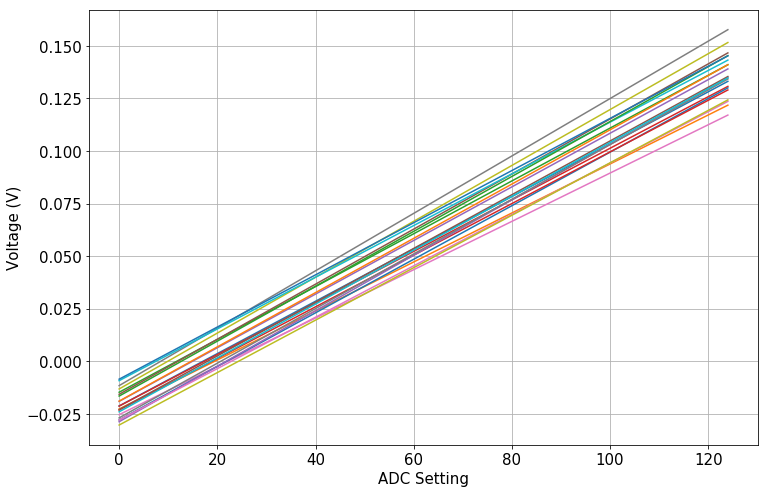

NameError: name 'lat' is not defined

In [6]:
def gen_lines(fits, lines):
    for line in fits: 
        name = line[0]
        m = line[4]
        b = line[5] 
        new_line = (m, b)
        lines[name] = new_line
    plot(lines)
    print
gen_lines(calib_fits, lines) 


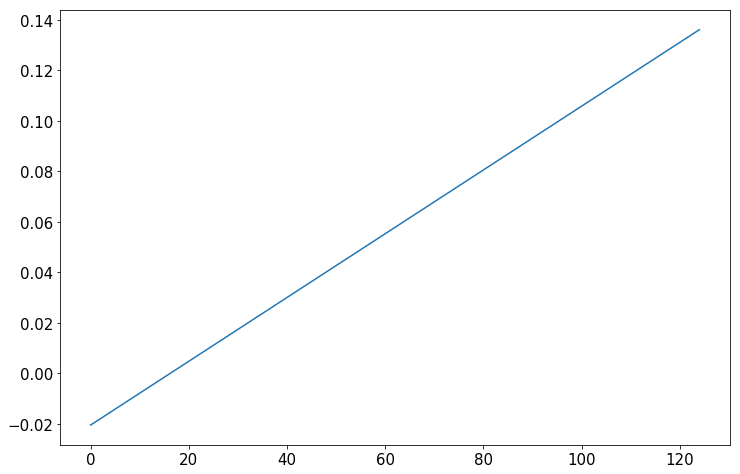

AMAC_B10 (0.001225633283112326, -0.021302426505040689)
AMAC_B09 (0.0013645432389622774, -0.011566816356252429)
AMAC_REF (0.0012629331364390217, -0.020474021414918338)
AMAC_A03 (0.0012770980470811306, -0.022988778681285377)
AMAC_A02 (0.0012445791323951118, -0.021245657822055727)
AMAC_B08 (0.0013281576046106124, -0.013156526860527505)
AMAC_A01 (0.001228882541051673, -0.0092153024984275283)
AMAC_A06 (0.0012731103557406575, -0.027889257448934661)
AMAC_A07 (0.0012397059879822366, -0.0085126817375435152)
AMAC_A04 (0.0013048951131294966, -0.016532801760338025)
AMAC_A05 (0.0012274344154717125, -0.023215157997858959)
AMAC_B01 (0.0013183722239780446, -0.028725716919915368)
AMAC_B03 (0.001221523807514777, -0.027913824377827589)
AMAC_B02 (0.0013089670010372869, -0.015707881494822117)
AMAC_B04 (0.0012464061432785069, -0.030304767821919931)
AMAC_B07 (0.001280231771027167, -0.024016917786936709)
AMAC_B06 (0.0011485160361160095, -0.025376282728136839)
AMAC_C01 (0.001274437853930368, -0.019042026546746

In [13]:
def gen_test_line(lines): 
    slopes = []
    intercepts = []
    for line in lines: 
        slopes.append(lines[line][0])
        intercepts.append(lines[line][1])
    mean_slope = np.mean(slopes)
    sd_slope = np.std(slopes)
    mean_intercept = np.mean(intercepts)
    sd_intercept = np.std(intercepts)
    ref = (mean_slope, mean_intercept)
    lines["AMAC_REF"] = ref
    plt.plot(x, mean_slope*x + mean_intercept)
    plt.show()
    
gen_test_line(lines)
for line in lines: 
    print line, lines[line]


AMAC_B10 1.04162484551e-05
AMAC_B09 0.000887330759137
AMAC_REF 0.0
AMAC_A03 5.97447914555e-05
AMAC_A02 7.48277904338e-06
AMAC_B08 0.000584603311684
AMAC_A01 0.00122963738918
AMAC_A06 0.000542345131337
AMAC_A07 0.00140313352101
AMAC_A04 0.000172457196214
AMAC_A05 8.52890349959e-05
AMAC_B01 0.000636182637603
AMAC_B03 0.000584885983579
AMAC_A09 0.000390158753089
AMAC_B04 0.000982774064219
AMAC_B07 0.000119492167642
AMAC_B06 0.000300775669895
AMAC_C01 2.21976821736e-05
AMAC_C02 7.32347734357e-05
AMAC_C03 0.000326668065862
AMAC_B02 0.000249807653583
AMAC_A10 2.77000227639e-05


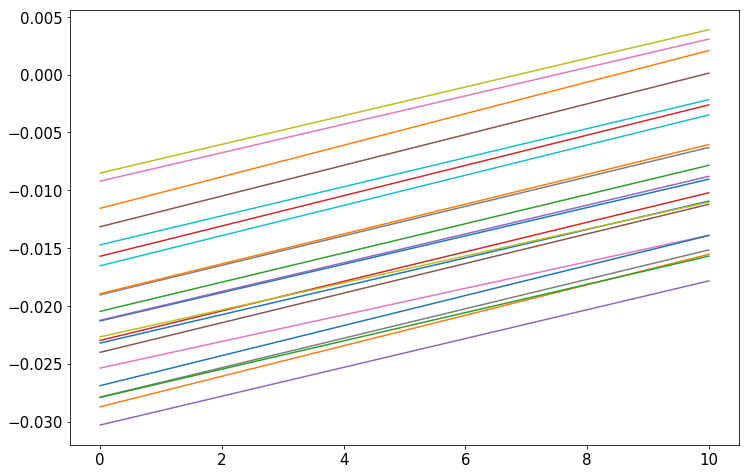

In [12]:
from scipy.integrate import quad

def diff_squared(line1, line2, x):
    y1 = line1[0]*x + line1[1]
    y2 = line2[0]*x + line2[1]
    return (y2-y1)**2

def compute_error(f, lower, upper): 
    ans, err = quad(f, lower, upper)
    return ans

def compare(lines): 
    diff_squared_errors = {}
    ref = lines["AMAC_REF"]
    for line in lines:
        test = lines[line]
        f = lambda x: diff_squared(ref, test, x)
        diff_squared_errors[line] = compute_error(f, 0, 10)
    for AMAC in diff_squared_errors: 
        print AMAC, diff_squared_errors[AMAC]

compare(lines)
plot(lines)